##  Import Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe

In [2]:
dataset = pd.read_csv(r"C:/Users/deni/Documents/Data Science/Click-on-Ad-Prediction.csv")
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Data exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
dataset.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


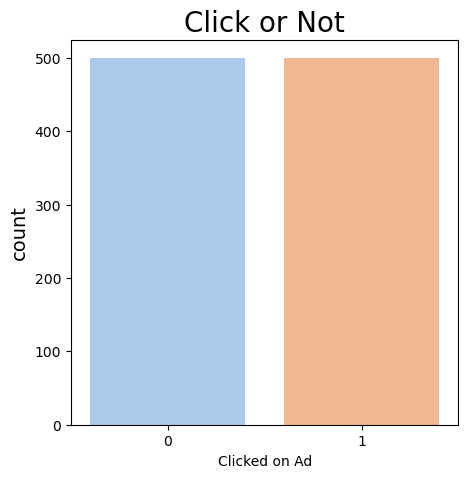

In [6]:
plt.rcParams['figure.figsize'] = (5, 5)
fig, ax = plt.subplots(1, 1)
sns.countplot(x='Clicked on Ad', data=dataset, palette='pastel', ax=ax)
ax.set_title('Click or Not', fontsize=20)
ax.set_ylabel('count', fontsize=14)
plt.show()

## Data Splitting

In [7]:
X = dataset.loc[:, ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']]
y = dataset['Clicked on Ad']
X.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage
0,68.95,61833.90,256.09
1,80.23,68441.85,193.77
2,69.47,59785.94,236.50
3,74.15,54806.18,245.89
4,68.37,73889.99,225.58


## Model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Evaluation

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

## Training Accuracy

In [11]:
model.score(X_train, y_train)

1.0

## Testing Accuracy

In [12]:
model.score(X_test, y_test)

0.91

## Report

In [13]:
confusion_matrix(y_test, y_pred)

array([[98, 10],
       [ 8, 84]], dtype=int64)

In [14]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.92       108\n           1       0.89      0.91      0.90        92\n\n    accuracy                           0.91       200\n   macro avg       0.91      0.91      0.91       200\nweighted avg       0.91      0.91      0.91       200\n'